In [19]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [59]:
mnist_dataset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

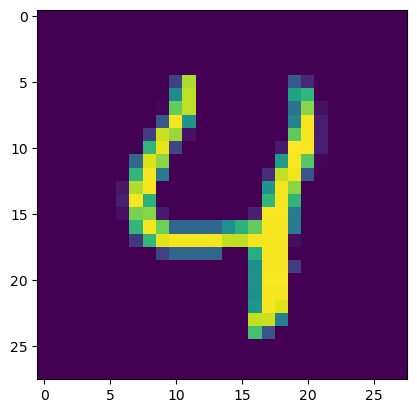

In [60]:
plt.imshow(test_images[4])

In [61]:
print(train_images.shape)

(60000, 28, 28)


In [62]:
train_images = np.expand_dims(train_images, -1)

In [63]:
test_images = np.expand_dims(test_images, -1)

In [64]:
print(train_images.shape)

(60000, 28, 28, 1)


In [26]:
input_shape = (28, 28, 1)
num_classes = 10

In [32]:
model = keras.Sequential([
    keras.Input(shape=input_shape),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')
])

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [36]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.6895 - loss: 6.0134 - val_accuracy: 0.9747 - val_loss: 0.0887
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9359 - loss: 0.2086 - val_accuracy: 0.9822 - val_loss: 0.0631
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9535 - loss: 0.1506 - val_accuracy: 0.9828 - val_loss: 0.0630
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9611 - loss: 0.1244 - val_accuracy: 0.9872 - val_loss: 0.0481
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9695 - loss: 0.0993 - val_accuracy: 0.9868 - val_loss: 0.0441
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9715 - loss: 0.0894 - val_accuracy: 0.9875 - val_loss: 0.0380
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9740 - loss: 0.0830 - val_accuracy: 0.9860 - val_loss: 0.0468
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9755 - loss: 0.0771 - 

In [37]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

Test Loss: 0.03569575771689415
Test Accuracy: 0.9886999726295471


In [76]:
train_images.shape

(60000, 28, 28, 1)

In [43]:
model.save("classical_model.keras")

In [74]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("classical_model.keras")
reconstructed_model.input_shape

# (train_images_2, train_labels_2), (test_images_2, test_labels_2) = mnist_dataset.load_data()
# test_input = test_images[0]

# # Let's check:
# np.testing.assert_allclose(
#     model.predict(test_input), reconstructed_model.predict(test_input)
# )

(None, 28, 28, 1)

In [75]:
model.input_shape

(None, 28, 28, 1)

In [131]:
test_images.shape
test_temp = np.array([test_images[0]])
test_temp.shape

(1, 28, 28, 1)

In [132]:
results = [np.argmax(row) for row in reconstructed_model.predict(test_temp)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [133]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [134]:
correct = 0
total = 0

for _, r in enumerate(results):
    if r == test_labels[_]:
        correct += 1
    
    total += 1

accuracy = correct / total

In [135]:
accuracy

1.0

In [136]:
results

[7]

In [129]:
test_temp_2 = np.array([test_images[0]])

In [130]:
print(type(test_temp_2), test_temp_2.shape)

<class 'numpy.ndarray'> (1, 28, 28, 1)
